#      BankNote Classification Using Artificial Neural Network Approach

        

<img style="width: 500px;height: 350px" src="202w.gif">


##  Problem Statement:

 "Given four features, the aim is to build a predictive model to determine if the Bank Notes are genuine or counterfeit." 
From the problem statement, it’s evident that this is a classification problem. Lets build the Classification Model using artificial neural network (ANN) approach. Lets use BankNote Authentication dataset to build on the classification model. You can find the dataset at:<a href="https://archive.ics.uci.edu/ml/machine-learning-databases/00267/">Bank note authentication dataset</a> 

Input to the system is an image acquired by a scanner or a digital camera, containing the paper currency and its output is the features of the paper currency. A high resolution scanner is used to acquire the image. The acquired image of a paper currency is first converted to gray scaled image. Conversion to gray scale facilitates further pre-processing. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
    

### So let's explore the Data Analysis for Bank Note Authentication Datasets!!

<img style="width: 500px;height: 350px"  src="200w.gif">


## Importing required tools:

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.python import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

## Understanding and Analysing the data

In [46]:
col_names=(' variance of Wavelet Transformed image',' skewness of Wavelet Transformed image','curtosis of Wavelet Transformed image','entropy of image',' target')
train=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt',names=col_names)
train.head(10)

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,target
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


## Attribute Information:

    1.variance of Wavelet Transformed image (continuous)
    2.skewness of Wavelet Transformed image (continuous)
    3.curtosis of Wavelet Transformed image (continuous)
    4.entropy of image (continuous)
    5.class (integer)

## Feature Extraction:

The potential features are extracted for efficient classification. The input vector can be written as follows:
   ####    F= (V,S,C,E)
The attributes of the images such as The variance of Wavelet Transformed image (continuous), skewness of Wavelet Transformed image (continuous),curtosis of Wavelet Transformed image (continuous),entropy of image (continuous) features are extracted from images for accurate classification.
A better explanation for feature selection based on correlation can be referred <a href="https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/
">here</a>

Details of the Wavelet transform can be found <a href="https://en.wikipedia.org/wiki/Wavelet_transform
">here</a>


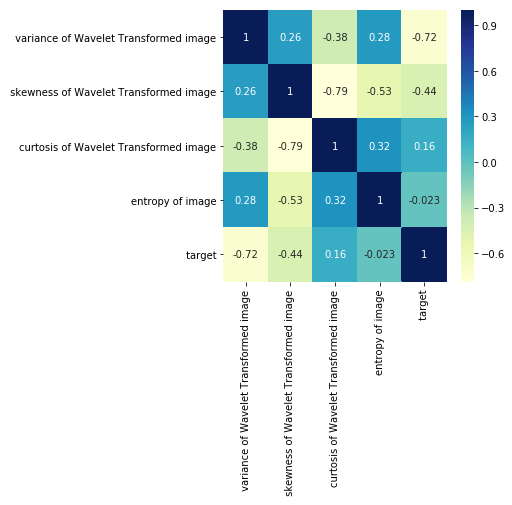

In [47]:
corr = train.corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

## Preprocessing of the datas:
    
####    Since all the features are highly correlated a clustering process shall be performed using artificial neural network (ANN) approach.

In [48]:
X=train.iloc[:,:4]
Y=train.iloc[:,-1]
X.head(10)


,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image
0,3.62160,8.6661,-2.80730,-0.44699
1,4.54590,8.1674,-2.45860,-1.46210
2,3.86600,-2.6383,1.92420,0.10645
3,3.45660,9.5228,-4.01120,-3.59440
4,0.32924,-4.4552,4.57180,-0.98880
5,4.36840,9.6718,-3.96060,-3.16250
6,3.59120,3.0129,0.72888,0.56421
7,2.09220,-6.8100,8.46360,-0.60216
8,3.20320,5.7588,-0.75345,-0.61251
9,1.53560,9.1772,-2.27180,-0.73535


In [49]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name:  target, dtype: int64

## Splitting and Normalizing Data

Data normalization is the process of rescaling one or more attributes to the range of 0 to 1. This means that the largest value for each attribute is 1 and the smallest value is 0.

The need for normalization of data can be better understood https://medium.com/@lahorekid/a-dummies-guide-to-data-normalization-for-neural-nets-ff1998116e75

In [50]:
X = (X-X.min()) / (X.max()-X.min())
xtrain,xtest,ytrain,ytest = train_test_split(np.array(X), np.array(Y), test_size=0.3)

## Defining the Model:

Feed forward backpropagation neural network originate from the problem of interpolating a set of data in a hyperspace to find the best hyper-plane that interpolates that set of data. 

The input layer consists of the data (or the pattern) that is to be interpolated (or classified). The hidden layer provides a nonlinear transformation from the input layer space to the hidden layer space. It usually consists of a high number of neurons. The output layer provides a linear transformation from the hidden layer space to the output layer space.

In this example, the neural network consists of 3 layers

<ul>
	<li>Layer1 - Input layer(4 nodes)</li>
	<li>Layer2 - Hidden layer(10 nodes)</li>
	<li>Layer3 - Output layer(2 nodes)</li>
</ul>
    
Four input parameters, one hidden layer with 10 neurons and two output has been used for the ANN. All of these parameters were real-valued continuous.
 To get a better idea of layers and node selection refer to this <a href="https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/
">article</a>
  Tanh is used as an <a href="https://www.geeksforgeeks.org/activation-functions-neural-networks/
">activation</a>
  for the input and the hidden layer while the softmax function is used for the output layer. The reason for using Tanh and softmax function was it gave a better <a href=" https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
">accuracy</a>
  while compared to other activation functions(trial and error).

In [51]:
model = keras.models.Sequential([
            keras.layers.Dense(10, activation=tf.nn.tanh, input_shape=(xtrain[0].shape), kernel_regularizer=keras.regularizers.l2(0.001)),
            keras.layers.Dense(2, activation=tf.nn.softmax)

])

In [52]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adamax(0.001),
              metrics=['accuracy']
              )

## Training the model:


The BackPropagation algorithm is used in the training procedure along with Cross-Validation. <a href=" https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/
">CV</a>
 is done to reduce bias and variance

In [63]:
history  = model.fit(xtrain,ytrain,epochs=100,verbose=2, validation_split=0.2)

Train on 768 samples, validate on 192 samples
Epoch 1/100
 - 0s - loss: 0.0414 - acc: 0.9870 - val_loss: 0.0469 - val_acc: 0.9896
Epoch 2/100
 - 0s - loss: 0.0416 - acc: 0.9818 - val_loss: 0.0464 - val_acc: 0.9896
Epoch 3/100
 - 0s - loss: 0.0414 - acc: 0.9870 - val_loss: 0.0468 - val_acc: 0.9896
Epoch 4/100
 - 0s - loss: 0.0414 - acc: 0.9870 - val_loss: 0.0469 - val_acc: 0.9896
Epoch 5/100
 - 0s - loss: 0.0414 - acc: 0.9870 - val_loss: 0.0465 - val_acc: 0.9896
Epoch 6/100
 - 0s - loss: 0.0414 - acc: 0.9857 - val_loss: 0.0463 - val_acc: 0.9896
Epoch 7/100
 - 0s - loss: 0.0418 - acc: 0.9870 - val_loss: 0.0469 - val_acc: 0.9896
Epoch 8/100
 - 0s - loss: 0.0415 - acc: 0.9844 - val_loss: 0.0462 - val_acc: 0.9896
Epoch 9/100
 - 0s - loss: 0.0415 - acc: 0.9870 - val_loss: 0.0465 - val_acc: 0.9896
Epoch 10/100
 - 0s - loss: 0.0413 - acc: 0.9870 - val_loss: 0.0466 - val_acc: 0.9896
Epoch 11/100
 - 0s - loss: 0.0413 - acc: 0.9844 - val_loss: 0.0462 - val_acc: 0.9896
Epoch 12/100
 - 0s - loss: 0

Epoch 97/100
 - 0s - loss: 0.0398 - acc: 0.9870 - val_loss: 0.0439 - val_acc: 0.9896
Epoch 98/100
 - 0s - loss: 0.0397 - acc: 0.9870 - val_loss: 0.0438 - val_acc: 0.9896
Epoch 99/100
 - 0s - loss: 0.0398 - acc: 0.9883 - val_loss: 0.0450 - val_acc: 0.9896
Epoch 100/100
 - 0s - loss: 0.0397 - acc: 0.9870 - val_loss: 0.0438 - val_acc: 0.9896


## Visualization of Model:

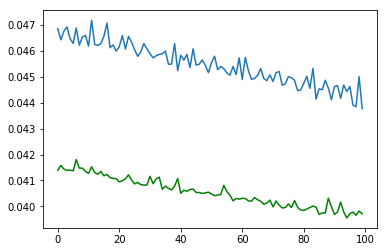

In [64]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'])

# Conclusion:

According to the results, it has been observed that 98% and above classification accuracy can be achieved.

In [67]:
loss, accuracy = model.evaluate(xtest,ytest)

412/412 [==============================] - 0s 78us/step


In [68]:
print(accuracy*100)

98.7864077669903


<img style="width: 450px;height: 325px" src="201w.gif">